# Interactive plots

## Codirectional coupling

In [80]:
%matplotlib inline
#%matplotlib widget
from math import *
import matplotlib.pyplot as plt
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

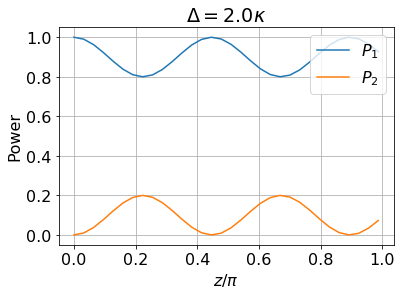

In [81]:
def cmt3(D):
    
    k=1
    L=5/4*pi
    d=np.sqrt(D**2+k**2)
    z = np.arange(0.0,L,0.1)
    
    X1=np.cos(d*z)-1.j*D/d*np.sin(d*z)
    X2=-1.j*k/d*np.sin(d*z)
    
    ax=plt.figure(1)
    #str = '$\kappa$={:.1f}, $L$={:.1f}, $\Delta$={:.1f}'.format(np.real(k),L,np.real(D))
    titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa$' 
    plt.rcParams.update({'font.size': 16})
    plt.title(titel1)
    plt.plot(z/pi,np.abs(X1)**2,label='$P_1$')
    plt.plot(z/pi,np.abs(X2)**2,label='$P_2$')
    plt.xlabel('$z/\pi$')
    plt.ylabel('Power')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
    
interactive_plot = interactive(cmt3, D=(0.0, 4.0, 0.1))
output = interactive_plot.children[0]
#output.layout.height = '350px'
interactive_plot

## Contradirectional coupling

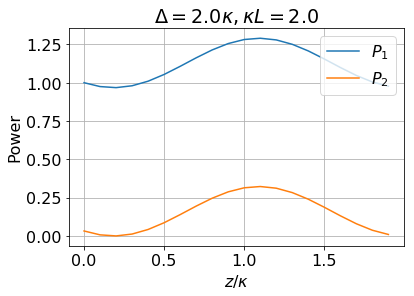

In [70]:
k = 1.0 #kappa
D = .50*k #Delta
L = 1.0

def cmt1(D,L):
    
    k=1
    if (D==1):D=1.00001
        
    s = np.sqrt(complex(k**2-D**2,0)) #we make this a complex number to make sure the sqrt function retuerns correct value for neg arg
    z = np.arange(0.0,L,0.1)
    temp = s*np.cosh(s*L)-1.j*D*np.sinh(s*L)
    C1 = (s*np.cosh(s*(z-L))-1.j*D*np.sinh(s*(z-L)))/temp # note: complex prefactor is neglected as it will be dropped in abs
    C2 = (k*np.sinh(s*(z-L)))/temp

    ax=plt.figure(1)
    #str = '$\kappa$={:.1f}, $L$={:.1f}, $\Delta$={:.1f}'.format(np.real(k),L,np.real(D))
    titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa, \kappa L=$' + str(L) 
    plt.rcParams.update({'font.size': 16})
    plt.title(titel1)
    plt.plot(z,np.abs(C1)**2,label='$P_1$')
    plt.plot(z,np.abs(C2)**2,label='$P_2$')
    plt.xlabel('$z/\kappa$')
    plt.ylabel('Power')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()


#cmt1(k1,D1,L1)

interactive_plot = interactive(cmt1, D=(0.0, 4.0, 0.1), L=(0,5,0.2))
output = interactive_plot.children[1]
#output.layout.height = '350px'
interactive_plot

### Reflection

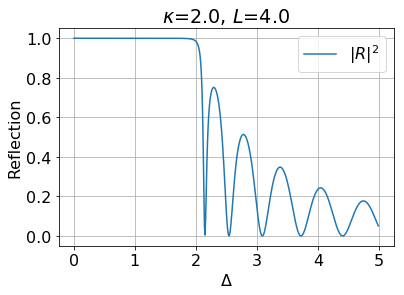

In [74]:
def cmt2(k,L):
    
    D = np.arange(0.001,5,0.01)
    s = np.sqrt((k+0.j)**2-D**2)

    R2 = np.sinh(s*L)**2/(np.cosh(s*L)**2-(D/k)**2)

    #str = '$\kappa$={:.1f}, $L$={:.1f}'.format(k,L) 

    title = '$\kappa$=' + str(k) + ', $L$=' + str(L)
    
    ax=plt.figure(2)
    plt.rcParams.update({'font.size': 16})
    plt.plot(D,np.real(R2),label='$|R|^2$')
    plt.title(title)
    plt.xlabel('$\Delta$')
    plt.ylabel('Reflection')
    plt.legend(loc='upper right')
    plt.grid()
    #plt.savefig('R2.png')
    plt.show()

interactive_plot = interactive(cmt2, k=(0.0, 4.0, 0.1), L=(0,8,0.2))
output = interactive_plot.children[1]
#output.layout.height = '350px'
interactive_plot

# Figures for course

## Codirectional coupling

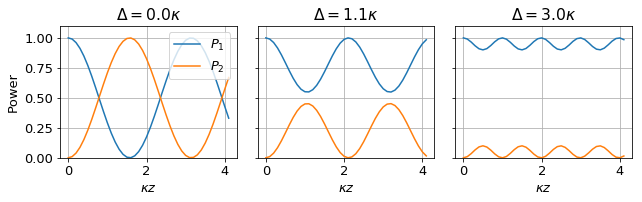

In [97]:
def cmt3b(z,D):
    k=1
    d=np.sqrt(D**2+k**2)
    X1=np.cos(d*z)-1.j*D/d*np.sin(d*z)
    X2=-1.j*k/d*np.sin(d*z)
    return X1,X2

D=0
L=5.25/4*pi
z = np.arange(0.0,L,0.1)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.rcParams.update({'font.size': 13})
ymax=1.1

D = 0 #Delta
C1,C2=cmt3b(z,D)
axs[0].plot(z,np.abs(C1)**2,label='$P_1$')
axs[0].plot(z,np.abs(C2)**2,label='$P_2$')
titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa$'
axs[0].set_title(titel1)

D = 1.1 #Delta
C1,C2=cmt3b(z,D)
axs[1].plot(z,np.abs(C1)**2,label='$P_1$')
axs[1].plot(z,np.abs(C2)**2,label='$P_2$')
titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa$'
axs[1].set_title(titel1)


D = 3.0 #Delta
C1,C2=cmt3b(z,D)
axs[2].plot(z,np.abs(C1)**2,label='$P_1$')
axs[2].plot(z,np.abs(C2)**2,label='$P_2$')
titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa$'
axs[2].set_title(titel1)

axs[0].set_ylim(0, ymax)
axs[1].set_ylim(0, ymax)
axs[2].set_ylim(0, ymax)
axs[0].set_ylabel('Power')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].set_xlabel('$\kappa z$')
axs[1].set_xlabel('$\kappa z$')
axs[2].set_xlabel('$\kappa z$')

axs[0].legend(loc='upper right')
fig.tight_layout()
plt.savefig('cmt_codir.png')
plt.show()



## Contradirectional coupling

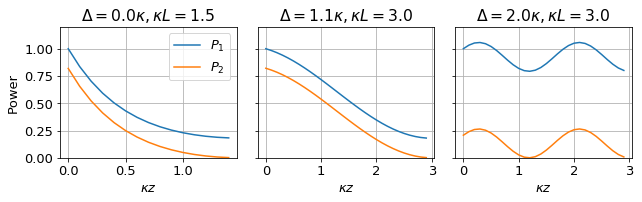

In [98]:
#create figure for course

def cmt1b(z,D,L):
    k=1
    if (D==1):D=1.00001        
    s = np.sqrt(complex(k**2-D**2,0)) #we make this a complex number to make sure the sqrt function retuerns correct value for neg arg
    temp = s*np.cosh(s*L)-1.j*D*np.sinh(s*L)
    C1 = (s*np.cosh(s*(z-L))-1.j*D*np.sinh(s*(z-L)))/temp # note: complex prefactor is neglected as it will be dropped in abs
    C2 = (k*np.sinh(s*(z-L)))/temp
    return C1,C2

D = 0 #Delta
L = 1.5
z = np.arange(0.0,L,0.1)
C1,C2=cmt1b(z,D,L)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
plt.rcParams.update({'font.size': 13})
ymax=1.2

D = 0 #Delta
L = 1.5
z = np.arange(0.0,L,0.1)
C1,C2=cmt1b(z,D,L)
axs[0].plot(z,np.abs(C1)**2,label='$P_1$')
axs[0].plot(z,np.abs(C2)**2,label='$P_2$')
titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa, \kappa L=$' + str(L) 
axs[0].set_title(titel1)

D = 1.1 #Delta
L = 3.0
z = np.arange(0.0,L,0.1)
C1,C2=cmt1b(z,D,L)
axs[1].plot(z,np.abs(C1)**2,label='$P_1$')
axs[1].plot(z,np.abs(C2)**2,label='$P_2$')
titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa, \kappa L=$' + str(L) 
axs[1].set_title(titel1)


D = 2.0 #Delta
L = 3.0
z = np.arange(0.0,L,0.1)
C1,C2=cmt1b(z,D,L)
axs[2].plot(z,np.abs(C1)**2,label='$P_1$')
axs[2].plot(z,np.abs(C2)**2,label='$P_2$')
titel1 = '$\Delta=$' + str(round(D,2)) +'$\kappa, \kappa L=$' + str(L) 
axs[2].set_title(titel1)

axs[0].set_ylim(0, ymax)
axs[1].set_ylim(0, ymax)
axs[2].set_ylim(0, ymax)
axs[0].set_ylabel('Power')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].set_xlabel('$\kappa z$')
axs[1].set_xlabel('$\kappa z$')
axs[2].set_xlabel('$\kappa z$')

axs[0].legend(loc='upper right')
fig.tight_layout()
plt.savefig('cmt_contra.png')
plt.show()



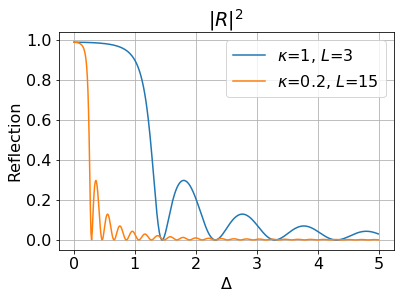

In [77]:
#plot figure from course - Reflection

def cmt2b(D,k,L):    
    s = np.sqrt((k+0.j)**2-D**2)
    R2 = np.sinh(s*L)**2/(np.cosh(s*L)**2-(D/k)**2)
    return R2

D = np.arange(0.001,5,0.01)

k=1
L=3
labela = '$\kappa$=' + str(k) + ', $L$=' + str(L)
R2a=cmt2b(D,k,L)

k=0.2
L=15
labelb = '$\kappa$=' + str(k) + ', $L$=' + str(L)
R2b=cmt2b(D,k,L)



title='$|R|^2$'

ax=plt.figure(2)
plt.rcParams.update({'font.size': 16})
plt.plot(D,np.real(R2a),label=labela)
plt.plot(D,np.real(R2b),label=labelb)
plt.title(title)
plt.xlabel('$\Delta$')
plt.ylabel('Reflection')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('R2.png')
plt.show()